## MNIST Data set explorer

Downloaded from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data).

See [Wikipeda-MNIST_database](https://en.wikipedia.org/wiki/MNIST_database).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data ingest

In [2]:
labels = []
digits = []
path_name = '../datasets/74k_train.csv'
#path_name = 'train_data.csv'
with open(path_name) as f:
    f.readline()
    for line in f.readlines():
        data = line.split(",")
        label = int(data[0])
        img = np.array(list(map(int, data[1:]))).reshape((28, 28))
        labels.append(label)
        digits.append(img)
labels = np.array(labels)

In [3]:
num_images = len(labels)
num_images

9144

## Plot random images

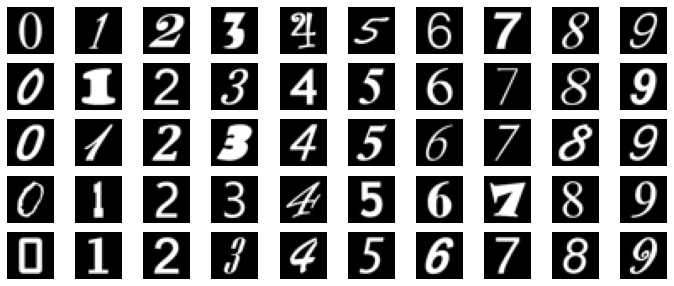

In [4]:
nrow = 5
fig, axes = plt.subplots(nrow, 10, figsize=(12, 5))
for j in range(10):
    idxs_j = np.arange(num_images)[labels == j]
    labels_j = labels[labels == j]
    idxs = np.random.choice(range(len(labels_j)), size=nrow, replace=False)
    for i in range(nrow):
        ax = axes[i][j]
        ax.imshow(digits[idxs_j[i]], cmap='gray', vmin=0, vmax=255)
        ax.axis('off')

## Plot mean images

In [5]:
def moving_average(prev, x, k):
    return (prev*(k-1) + x)/k

In [6]:
mean_imgs = [np.zeros((28, 28)) for j in range(10)]
for j in range(10):
    idxs_j = np.arange(num_images)[labels == j]
    for i, idx in enumerate(idxs_j):
        mean_imgs[j] = moving_average(mean_imgs[j], digits[idx], i+1)       

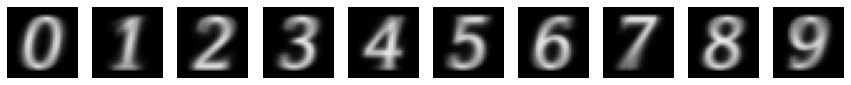

In [7]:
fig, axes = plt.subplots(1, 10, figsize=(15, 10))
for j in range(10):
    ax = axes[j]
    ax.imshow(mean_imgs[j], cmap='gray', vmin=0, vmax=255)
    ax.axis('off')

## Plot distributions

In [8]:
counts = [sum(labels==i) for i in range(10)]
counts

[923, 917, 920, 910, 916, 910, 931, 917, 901, 899]

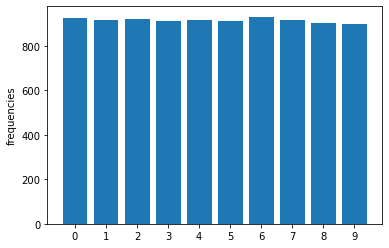

In [9]:
plt.bar(range(10), counts);
plt.xticks(range(10));
plt.ylabel('frequencies');